<a href="https://colab.research.google.com/github/ritikadeshmukh12/ML__LAB/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


Training Images

In [2]:
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)
test_labels


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [3]:
from keras import models
from keras import layers
network = models.Sequential()
# Dense(32) is a fully-connected layer with 32 hidden units.
# in the first layer, you must specify the expected input data shape :
# here, 28 X 28=784 -dimensional vectors.
network.add(layers.Dense(32, activation='sigmoid', input_shape=(28 * 28, )))
network.add(layers.Dense(8, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))
network.summary()
from google.colab import drive
drive.mount('/content/drive')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 25474 (99.51 KB)
Trainable params: 25474 (99.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Mounted at /content/drive


In [4]:

network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.

In [6]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
train_labels
test_labels = to_categorical(test_labels)
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
network.fit(train_images, train_labels, epochs=160, batch_size=512)

Epoch 1/160
118/118 [==============================] - 1s 5ms/step - loss: 2.3578 - accuracy: 0.1044
Epoch 2/160
118/118 [==============================] - 1s 6ms/step - loss: 2.3171 - accuracy: 0.1044
Epoch 3/160
118/118 [==============================] - 1s 6ms/step - loss: 2.2989 - accuracy: 0.1102
Epoch 4/160
118/118 [==============================] - 1s 6ms/step - loss: 2.2880 - accuracy: 0.1257
Epoch 5/160
118/118 [==============================] - 1s 6ms/step - loss: 2.2798 - accuracy: 0.1472
Epoch 6/160
118/118 [==============================] - 1s 6ms/step - loss: 2.2726 - accuracy: 0.1707
Epoch 7/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2657 - accuracy: 0.2126
Epoch 8/160
118/118 [==============================] - 0s 4ms/step - loss: 2.2587 - accuracy: 0.2553
Epoch 9/160
118/118 [==============================] - 0s 4ms/step - loss: 2.2515 - accuracy: 0.2808
Epoch 10/160
118/118 [==============================] - 0s 4ms/step - loss: 2.2439 - accura

In [8]:

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Accuracy: {:.5f} '.format(test_acc))
test_acc

313/313 [==============================] - 1s 1ms/step - loss: 0.6456 - accuracy: 0.8347
Test Accuracy: 0.83470 


0.8346999883651733

Epoch 1/5
79/79 [==============================] - 1s 7ms/step - loss: 0.6647 - accuracy: 0.8273 - val_loss: 0.6493 - val_accuracy: 0.8338
Epoch 2/5
79/79 [==============================] - 1s 9ms/step - loss: 0.6623 - accuracy: 0.8281 - val_loss: 0.6472 - val_accuracy: 0.8347
Epoch 3/5
79/79 [==============================] - 1s 8ms/step - loss: 0.6600 - accuracy: 0.8286 - val_loss: 0.6450 - val_accuracy: 0.8352
Epoch 4/5
79/79 [==============================] - 1s 10ms/step - loss: 0.6577 - accuracy: 0.8291 - val_loss: 0.6429 - val_accuracy: 0.8356
Epoch 5/5
79/79 [==============================] - 1s 10ms/step - loss: 0.6554 - accuracy: 0.8295 - val_loss: 0.6408 - val_accuracy: 0.8363
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


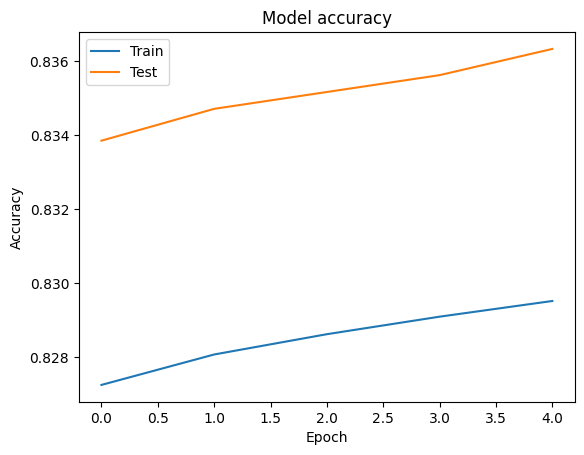

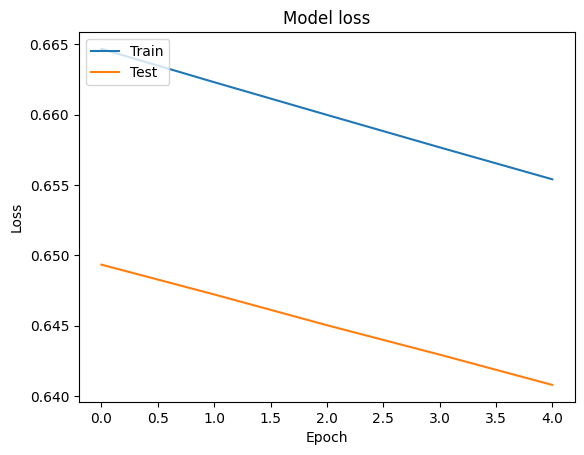

In [9]:
from keras.utils import plot_model
plot_model(network, to_file='model.png')
import matplotlib.pyplot as plt
history =network.fit(train_images, train_labels, validation_split=0.33,epochs=5, batch_size=512)
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()